## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [6]:
"""
Compile 模型
"""
# optimizer = keras.optimizers.SGD(lr=0.001)
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 13s 268us/step - loss: 1.9398 - accuracy: 0.3000 - val_loss: 1.7491 - val_accuracy: 0.3806
Epoch 2/500
50000/50000 [==============================] - 12s 248us/step - loss: 1.7030 - accuracy: 0.3924 - val_loss: 1.6942 - val_accuracy: 0.3932
Epoch 3/500
50000/50000 [==============================] - 13s 255us/step - loss: 1.6017 - accuracy: 0.4307 - val_loss: 1.5881 - val_accuracy: 0.4331
Epoch 4/500
50000/50000 [==============================] - 13s 252us/step - loss: 1.5405 - accuracy: 0.4534 - val_loss: 1.5473 - val_accuracy: 0.4423
Epoch 5/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.4966 - accuracy: 0.4671 - val_loss: 1.5267 - val_accuracy: 0.4608
Epoch 6/500
50000/50000 [==============================] - 13s 254us/step - loss: 1.4568 - accuracy: 0.4822 - val_loss: 1.4800 - val_accuracy: 0.4755
Epoch 7/500
50000/50000 [=========================

50000/50000 [==============================] - 13s 258us/step - loss: 0.5712 - accuracy: 0.7956 - val_loss: 1.9266 - val_accuracy: 0.5179
Epoch 55/500
50000/50000 [==============================] - 12s 246us/step - loss: 0.5644 - accuracy: 0.7976 - val_loss: 1.9750 - val_accuracy: 0.5157
Epoch 56/500
50000/50000 [==============================] - 12s 243us/step - loss: 0.5501 - accuracy: 0.8034 - val_loss: 2.0137 - val_accuracy: 0.5075
Epoch 57/500
50000/50000 [==============================] - 11s 220us/step - loss: 0.5477 - accuracy: 0.8035 - val_loss: 1.9914 - val_accuracy: 0.4977
Epoch 58/500
50000/50000 [==============================] - 10s 210us/step - loss: 0.5283 - accuracy: 0.8116 - val_loss: 2.0022 - val_accuracy: 0.5147
Epoch 59/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.5258 - accuracy: 0.8119 - val_loss: 2.0219 - val_accuracy: 0.5165
Epoch 60/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.5108 - accuracy: 0.819

50000/50000 [==============================] - 10s 205us/step - loss: 0.2494 - accuracy: 0.9106 - val_loss: 3.6452 - val_accuracy: 0.5007
Epoch 109/500
50000/50000 [==============================] - 11s 210us/step - loss: 0.2608 - accuracy: 0.9066 - val_loss: 3.7534 - val_accuracy: 0.5004
Epoch 110/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.2484 - accuracy: 0.9094 - val_loss: 3.7233 - val_accuracy: 0.4996
Epoch 111/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.2243 - accuracy: 0.9193 - val_loss: 3.6550 - val_accuracy: 0.5047
Epoch 112/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.2059 - accuracy: 0.9255 - val_loss: 3.8340 - val_accuracy: 0.5027
Epoch 113/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.2328 - accuracy: 0.9159 - val_loss: 3.8524 - val_accuracy: 0.4960
Epoch 114/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.2582 - accuracy:

50000/50000 [==============================] - 12s 243us/step - loss: 0.1610 - accuracy: 0.9436 - val_loss: 4.8056 - val_accuracy: 0.5015s - los
Epoch 162/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.1441 - accuracy: 0.9477 - val_loss: 5.0461 - val_accuracy: 0.4959
Epoch 163/500
50000/50000 [==============================] - 12s 234us/step - loss: 0.1250 - accuracy: 0.9565 - val_loss: 5.0848 - val_accuracy: 0.4924
Epoch 164/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1546 - accuracy: 0.9446 - val_loss: 5.1529 - val_accuracy: 0.4897
Epoch 165/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1995 - accuracy: 0.9313 - val_loss: 5.0502 - val_accuracy: 0.4859
Epoch 166/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1797 - accuracy: 0.9360 - val_loss: 5.0252 - val_accuracy: 0.4937
Epoch 167/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.1808 - ac

Epoch 215/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.1041 - accuracy: 0.9643 - val_loss: 5.8911 - val_accuracy: 0.4883
Epoch 216/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1429 - accuracy: 0.9508 - val_loss: 6.0338 - val_accuracy: 0.4883
Epoch 217/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.1541 - accuracy: 0.9457 - val_loss: 5.8082 - val_accuracy: 0.4899
Epoch 218/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.1422 - accuracy: 0.9515 - val_loss: 5.8453 - val_accuracy: 0.4886
Epoch 219/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.1606 - accuracy: 0.9456 - val_loss: 5.9217 - val_accuracy: 0.4943
Epoch 220/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1518 - accuracy: 0.9487 - val_loss: 6.1145 - val_accuracy: 0.4857
Epoch 221/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.13

50000/50000 [==============================] - 12s 237us/step - loss: 0.1857 - accuracy: 0.9429 - val_loss: 6.9041 - val_accuracy: 0.4743
Epoch 269/500
50000/50000 [==============================] - 12s 233us/step - loss: 0.2514 - accuracy: 0.9230 - val_loss: 6.6176 - val_accuracy: 0.4940
Epoch 270/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.1169 - accuracy: 0.9592 - val_loss: 6.2914 - val_accuracy: 0.4889
Epoch 271/500
50000/50000 [==============================] - 11s 224us/step - loss: 0.0506 - accuracy: 0.9827 - val_loss: 6.6493 - val_accuracy: 0.4964
Epoch 272/500
50000/50000 [==============================] - 10s 204us/step - loss: 0.1092 - accuracy: 0.9638 - val_loss: 6.5250 - val_accuracy: 0.4928
Epoch 273/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0825 - accuracy: 0.9712 - val_loss: 6.5818 - val_accuracy: 0.4848
Epoch 274/500
50000/50000 [==============================] - 10s 205us/step - loss: 0.0726 - accuracy:

Epoch 322/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.2488 - accuracy: 0.9299 - val_loss: 6.8789 - val_accuracy: 0.4863
Epoch 323/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1873 - accuracy: 0.9438 - val_loss: 7.0910 - val_accuracy: 0.4896
Epoch 324/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0722 - accuracy: 0.9759 - val_loss: 7.0693 - val_accuracy: 0.4919
Epoch 325/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.0556 - accuracy: 0.9806 - val_loss: 7.0186 - val_accuracy: 0.4962
Epoch 326/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.0464 - accuracy: 0.9842 - val_loss: 7.1806 - val_accuracy: 0.4896
Epoch 327/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0723 - accuracy: 0.9750 - val_loss: 7.1792 - val_accuracy: 0.4933
Epoch 328/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.15

50000/50000 [==============================] - 12s 243us/step - loss: 0.3151 - accuracy: 0.9136 - val_loss: 7.2036 - val_accuracy: 0.4929s - loss: 0.3164 - accuracy
Epoch 376/500
50000/50000 [==============================] - 12s 239us/step - loss: 0.1262 - accuracy: 0.9600 - val_loss: 7.1540 - val_accuracy: 0.4942
Epoch 377/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.0628 - accuracy: 0.9786 - val_loss: 7.0854 - val_accuracy: 0.4977
Epoch 378/500
50000/50000 [==============================] - 11s 215us/step - loss: 0.0182 - accuracy: 0.9950 - val_loss: 7.2170 - val_accuracy: 0.5009
Epoch 379/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0102 - accuracy: 0.9977 - val_loss: 7.3634 - val_accuracy: 0.5031
Epoch 380/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0069 - accuracy: 0.9987 - val_loss: 7.4213 - val_accuracy: 0.5032
Epoch 381/500
50000/50000 [==============================] - 11s 211us/step

Epoch 429/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 6.8225 - val_accuracy: 0.5050
Epoch 430/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 6.9243 - val_accuracy: 0.5058
Epoch 431/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 7.0274 - val_accuracy: 0.5086
Epoch 432/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.2729 - accuracy: 0.9452 - val_loss: 6.0165 - val_accuracy: 0.4471
Epoch 433/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.5276 - accuracy: 0.8635 - val_loss: 5.5465 - val_accuracy: 0.4899
Epoch 434/500
50000/50000 [==============================] - 10s 207us/step - loss: 0.0909 - accuracy: 0.9680 - val_loss: 5.8157 - val_accuracy: 0.4917
Epoch 435/500
50000/50000 [==============================] - 10s 206us/step - loss: 0.03

50000/50000 [==============================] - 12s 238us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 6.7652 - val_accuracy: 0.5081
Epoch 483/500
50000/50000 [==============================] - 12s 238us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 6.8418 - val_accuracy: 0.5052
Epoch 484/500
50000/50000 [==============================] - 12s 237us/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 6.8913 - val_accuracy: 0.5060
Epoch 485/500
50000/50000 [==============================] - 11s 211us/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 7.0045 - val_accuracy: 0.5066
Epoch 486/500
50000/50000 [==============================] - 11s 212us/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 7.0908 - val_accuracy: 0.5049
Epoch 487/500
50000/50000 [==============================] - 10s 209us/step - loss: 0.8246 - accuracy: 0.8147 - val_loss: 4.8860 - val_accuracy: 0.4848
Epoch 488/500
50000/50000 [==============================] - 10s 208us/step - loss: 0.1690 - accuracy:

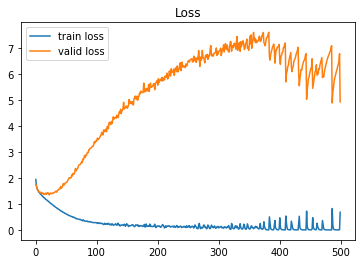

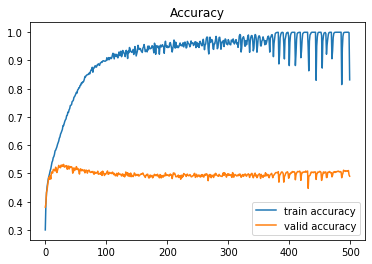

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()